# NGC 2516 vs the Pleiades

These two clusters have similar ages, but do their CMDs show a similar morphology for low-mass stars?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Import NGC 2516 low-mass star data.

In [2]:
ngc2516 = np.genfromtxt('data/ngc2516_Christophe_v3.dat')                   # data for this study from J&J (2012)
irwin01 = np.genfromtxt('data/irwin2007.phot')                              # data from Irwin+ (2007)
jeffr01 = np.genfromtxt('data/jeff_2001.tsv', delimiter=';', comments='#')  # data from Jeffries+ (2001)
jeffr01 = np.array([star for star in jeffr01 if star[9] == 1])              # extract candidate members

Now data for the Pleiades.

In [3]:
pleiades_s07 = np.genfromtxt('../pleiades_colors/data/Stauffer_Pleiades_litPhot.txt', usecols=(2, 3, 5, 6, 8, 9, 13, 14, 15))
pleiades_k14 = np.genfromtxt('../pleiades_colors/data/Kamai_Pleiades_cmd.dat', usecols=(0, 1, 2, 3, 4, 5))
iso_emp_k14  = np.genfromtxt('../pleiades_colors/data/Kamai_Pleiades_emp.iso') # empirical Pleiades isochrone

Adopt literature values for reddening, neglecting differential reddening across the Pleiades.

In [4]:
pl_dis = 5.61
pl_ebv = 0.034
pl_evi = 1.25*pl_ebv
pl_evk = 2.78*pl_ebv
pl_eik = pl_evk - pl_evi
pl_av  = 3.12*pl_ebv

ng_dis = 7.95
ng_ebv = 0.12
ng_evi = 1.25*ng_ebv
ng_evk = 2.78*ng_ebv
ng_eik = ng_evk - ng_evi
ng_av  = 3.12*ng_ebv

Overlay the CMDs for each cluster, corrected for reddening and distance.

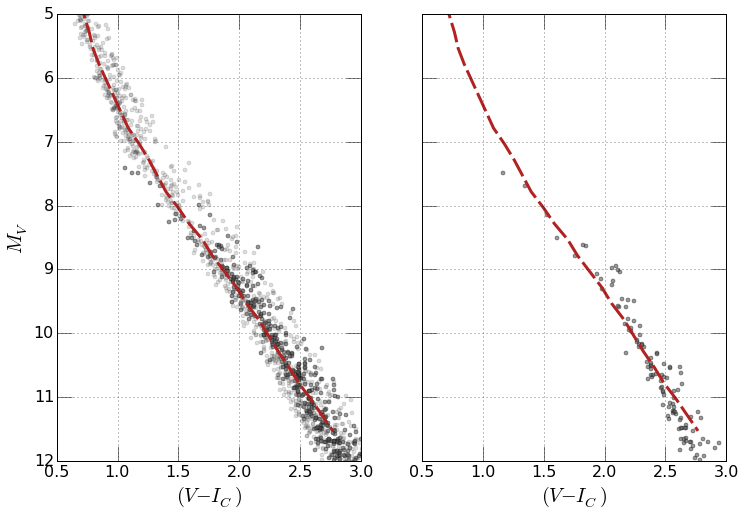

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharex=True, sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(12., 5.)
    axis.set_xlim(0.5, 3.0)
    axis.set_xlabel('$(V - I_C)$', fontsize=20.)

ax[0].set_ylabel('$M_V$', fontsize=20.)

ax[0].plot(jeffr01[:,5] - ng_evi, jeffr01[:,3] - ng_av - ng_dis, 
            'o', markersize=4.0, c='#555555', alpha=0.2)
ax[0].plot(ngc2516[:, 1] - ngc2516[:, 2] - ng_evi, ngc2516[:, 1] - ng_av - ng_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.6)
ax[0].plot(irwin01[:, 7] - irwin01[:, 8] - ng_evi, irwin01[:, 7] - ng_av - ng_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.6)
ax[0].plot(iso_emp_k14[:, 2] - pl_evi, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#b22222')

ax[1].plot(ngc2516[:, 1] - ngc2516[:, 2] - ng_evi, ngc2516[:, 1] - ng_av - ng_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.6)
ax[1].plot(iso_emp_k14[:, 2] - pl_evi, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#b22222')

While the Stauffer et al (2007) and Jackson et al. (2009) samples lie a bit redward of the median sequence in the Jeffries et al. (2001), the former two samples compare well against the empirical cluster sequence (shown as a red dashed line; Kamai et al. 2014) from the Pleiades in a $M_V/(V-I_C)$ CMD. 

What about $M_V/(V-K)$ and $M_V/(I_C-K)$ CMDs?

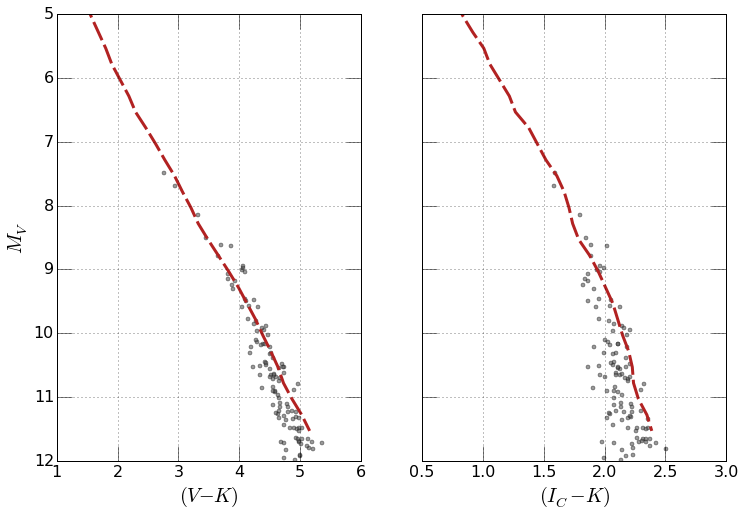

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(12., 5.)
    
ax[0].set_xlim(1.0, 6.0)
ax[0].set_xlabel('$(V - K)$', fontsize=20.)
ax[0].set_ylabel('$M_V$', fontsize=20.)

ax[0].plot(ngc2516[:, 1] - ngc2516[:, 3] - ng_evk, ngc2516[:, 1] - ng_av - ng_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.6)
ax[0].plot(iso_emp_k14[:, 3] - pl_evk, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#b22222')

ax[1].set_xlim(0.5, 3.0)
ax[1].set_xlabel('$(I_C - K)$', fontsize=20.)

ax[1].plot(ngc2516[:, 2] - ngc2516[:, 3] - ng_eik, ngc2516[:, 1] - ng_av - ng_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.6)
ax[1].plot(iso_emp_k14[:, 3] - iso_emp_k14[:, 2] - pl_eik, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#b22222')

While data in the $M_V/(V-I_C)$ CMD appears to be bluer for early M-dwarf stars and redder for later M-dwarf stars, we find that M-dwarfs in NGC 2516 appear to be generally bluer than low-mass stars in the Pleiades. 